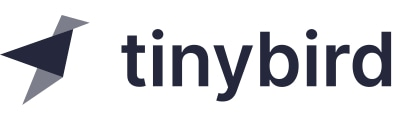
#Principles of Real-Time Analytics Course

`Copy to Drive` (see above) the Notebook.

In [1]:
#@title Mount your Google Drive to save and use local files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [2]:
#@title Install Tinybird CLI and your token
!pip install tinybird-cli -q -U

import os

if not os.path.isdir('./datasources'):
  !tb init

if not os.path.isfile('.tinyb'): 
  !tb auth

     |████████████████████████████████| 72 kB 960 kB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 61 kB 7.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
#@title Helper function
def write_text_to_file(filename, text):
  with open(filename, 'w') as f: f.write(text)

## Notebook Purpose

|Create|
| ----------------- |
| products.datasource|

#Tinybird Products Dataset
Synthetic data of around 2 M rows of product information (a dimensions table).


Generate a data source file from the CSV URL.

In [4]:
!tb datasource generate https://storage.googleapis.com/tinybird-assets/datasets/guides/products_1.csv

** Generated datasources/products_1.datasource
** => Create it on the server running: $ tb push datasources/products_1.datasource
** => Append data using: $ tb datasource append products_1 https://storage.googleapis.com/tinybird-assets/datasets/guides/products_1.csv`



In [5]:
!mv datasources/products_1.datasource datasources/products.datasource

In [6]:
!cat datasources/products.datasource

DESCRIPTION generated from https://storage.googleapis.com/tinybird-assets/datasets/guides/products_1.csv

SCHEMA >
    `sku` String,
    `color` String,
    `section_id` Int16,
    `title` String

Push the data source file to Tinybird.

In [7]:
!tb push datasources/products.datasource

** Processing datasources/products.datasource
** Building dependencies
** Running products 
** 'products' created
** Not pushing fixtures


Add the data from the first file.

In [8]:
!tb datasource append products https://storage.googleapis.com/tinybird-assets/datasets/guides/products_1.csv

** 🥚 starting import process
** 🐥 done
** Appended 1200000 new rows
** Total rows in products: 1200000
** Data appended to Data Source 'products' successfully!
** Data pushed to products


Add the data from the second file.

In [9]:
!tb datasource append products https://storage.googleapis.com/tinybird-assets/datasets/guides/products_2.csv

** 🥚 starting import process
** 🐥 done
** Appended 1241156 new rows
** Total rows in products: 2441156
** Data appended to Data Source 'products' successfully!
** Data pushed to products


Query your data.

In [10]:
!tb sql --stats "SELECT count() FROM products"

** Query took 0.000240217 seconds
** Rows read: 1
** Bytes read: 4.1 KB
-----------
| count() |
-----------
| 2441156 |
-----------


In [11]:
!tb sql --stats "SELECT * FROM products LIMIT 1"

** Query took 0.002684189 seconds
** Rows read: 1
** Bytes read: 82 bytes
-----------------------------------------------------------------------------
| sku                                  | color | section_id | title         |
-----------------------------------------------------------------------------
| 60000034-1aaa-11eb-aa9a-acde48001122 | tan4  |         45 | Heart on Snow |
-----------------------------------------------------------------------------


In [12]:
!tb sql --rows_limit 1 --stats "SELECT * FROM products"

** Query took 0.001123744 seconds
** Rows read: 423
** Bytes read: 48.91 KB
-------------------------------------------------
sku: 5cd4ea50-1aaa-11eb-bacb-acde48001122
color: LightSkyBlue4
section_id: 0
title: Bittersweet [Limited Edition w/ Bonus DVD]
-------------------------------------------------


In the Tinybird UI:

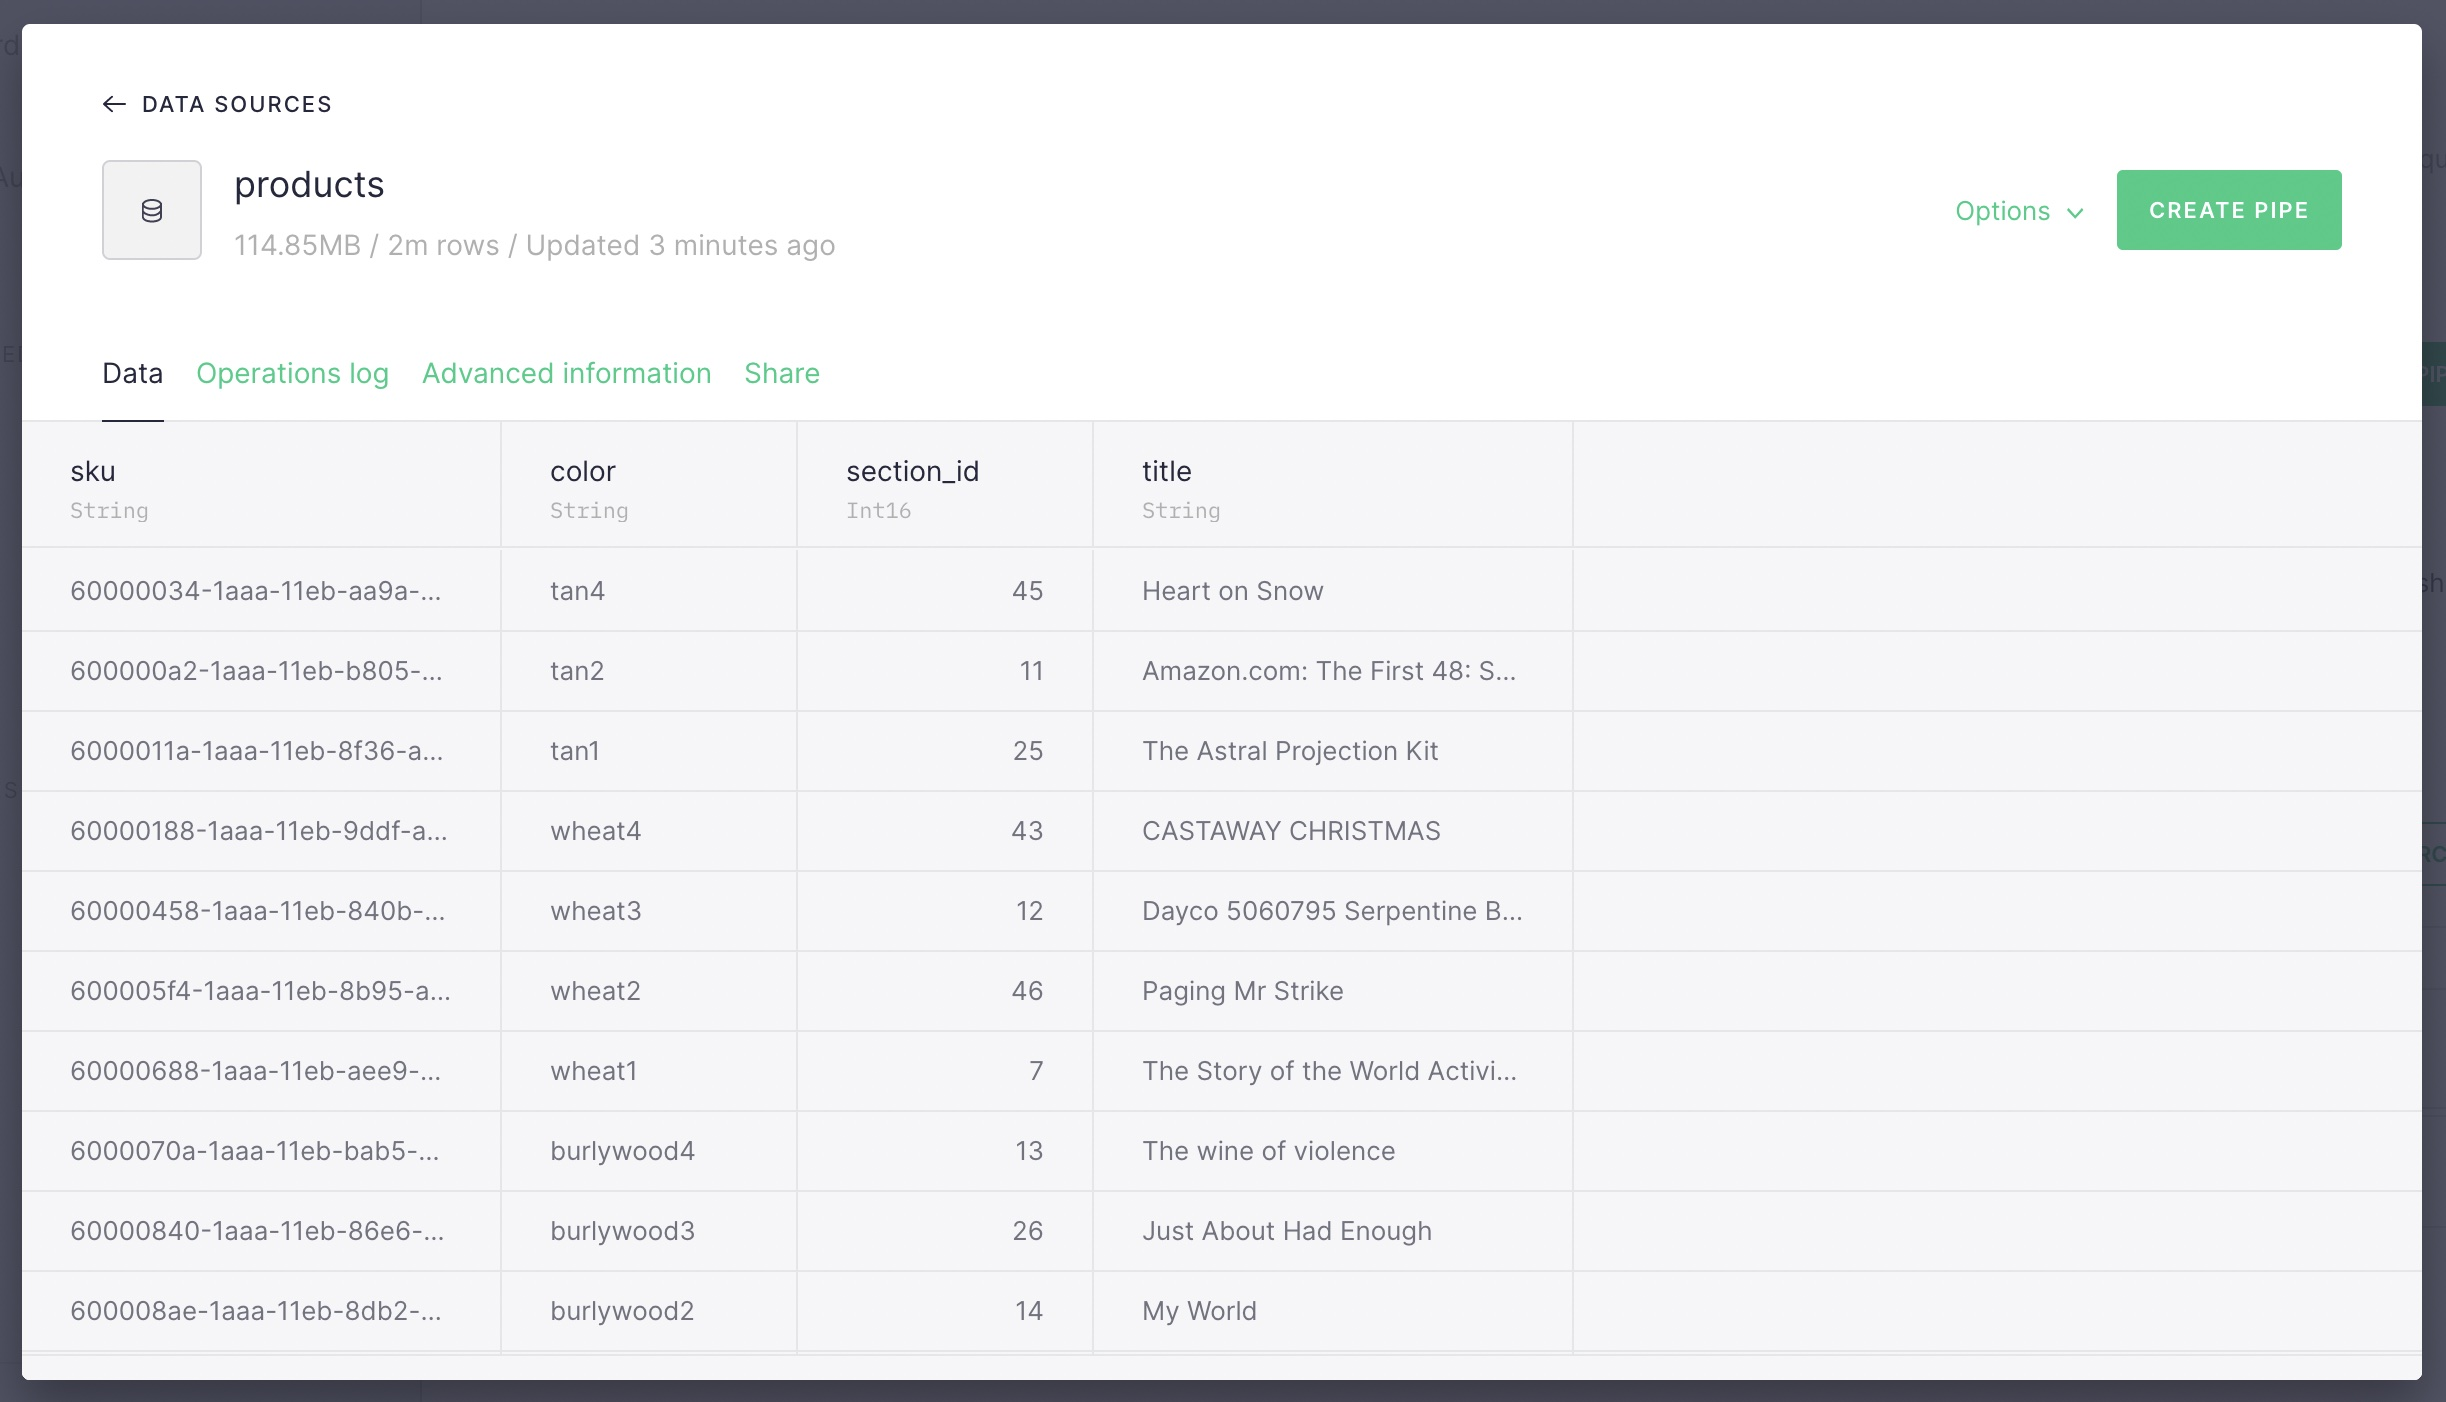